In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm

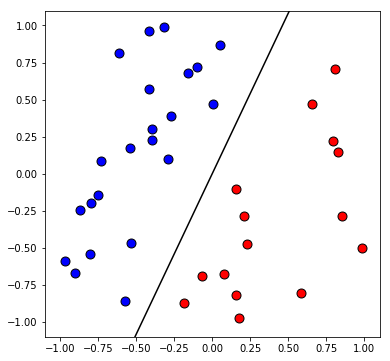

In [17]:
# np.random.seed(666)
theta = np.random.uniform(0, 2*np.pi)
a = np.array([np.cos(theta), np.sin(theta)])
x0 = np.random.uniform(-1, 1, size=40)
x1 = np.random.uniform(-1, 1, size=40)
X = np.array([x0, x1]).T
I = np.abs(X.dot(a)) > 0.1
X = X[I]
y = np.sign(X.dot(a))

plt.figure(figsize=(6, 6))
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
≈
t = np.arange(-1.2, 1.2, 0.1)
plt.plot(t, -a[0]/a[1]*t, 'k')
plt.show()

In [23]:
def misclassifications(w, X, y):
    return np.sign(X.dot(w)) != y

def error(w, X, y):
    I = misclassifications(w, X, y)
    return np.sum(-X[I, :].dot(w)*y[I])

def grad(w, X, y):
    I = misclassifications(w, X, y)
    return -np.sum(X[I]*y[I].reshape(-1, 1), axis=0)

def update(w, X, y, rate):
    return w - rate*grad(w, X, y)

4 iterations, w = (-0.3039, 0.0789), error: 0.0000
a = (-0.9080, 0.4190)


IndexError: boolean index did not match indexed array along dimension 0; dimension is 40 but corresponding boolean dimension is 37

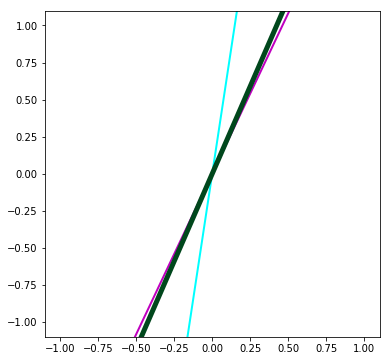

In [26]:
psi = np.random.uniform(-np.pi/2, np.pi/2)
w0 = np.array([1, np.tan(psi)])
w = w0

N = 0
ws = []
while (error(w, X, y) > 1e-6):
    w = update(w, X, y, 0.03)
    ws.append(w)
#     w = w/np.linalg.norm(w)
    N = N + 1

ws = np.array(ws)

print(f"{N} iterations, w = ({w[0]:.4f}, {w[1]:.4f}), error: {error(w, X, y):.4f}")
print(f"a = ({a[0]:.4f}, {a[1]:.4f})")

c = cm.get_cmap("Greens")
w = w0
plt.figure(figsize=(6, 6))
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
t = np.arange(-1.2, 1.2, 0.1)
plt.plot(t, -w[0]/w[1]*t, color="cyan", linewidth=2)
for i in range(N):
    w = update(w, X, y, 0.04)
#     w = w/np.linalg.norm(w)
    plt.plot(t, -w[0]/w[1]*t, linewidth=3*i/N, color = c((i+1)/N))

plt.plot(t, -a[0]/a[1]*t, 'm', linewidth=2)
plt.plot(t, -w[0]/w[1]*t, linewidth=5, color = c(0.99))
plt.plot(x0[y < 0], x1[y < 0], 'ro', markeredgecolor='k', markersize=9)
plt.plot(x0[y > 0], x1[y > 0], 'bo', markeredgecolor='k', markersize=9)

print(f"Worked? {np.unique(2*(X.dot(w) > 0) - 1 == y)}")
plt.show()

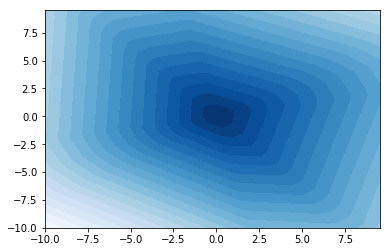

In [21]:
t = np.arange(-10, 10, 0.5)
W0, W1 = np.meshgrid(t, t)

Z = np.zeros_like(W0)
ZZ = np.zeros_like(W0)
for x in X[:6, :]:
    Z = Z + np.maximum(x[0]*W0 + x[1]*W1, ZZ)
M = np.max(Z)
plt.contourf(W0, W1, M - Z, levels=np.arange(0, M, 1), cmap="Blues")
plt.show()

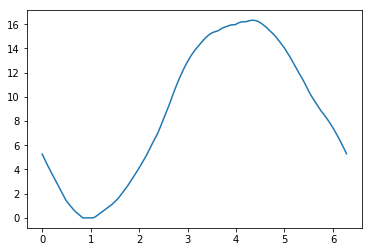

In [22]:
def W(theta):
    return np.array([np.cos(theta), np.sin(theta)])

def cost(X, y, w):
    return np.sum(np.maximum(-y*(X.dot(w)), 0))

thetas = np.arange(0, 2*np.pi, 0.01)

costs = np.array([cost(X, y, W(theta)) for theta in thetas])
plt.plot(thetas, costs)

In [25]:
thetas[costs == 0]

array([0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95,
       0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03])

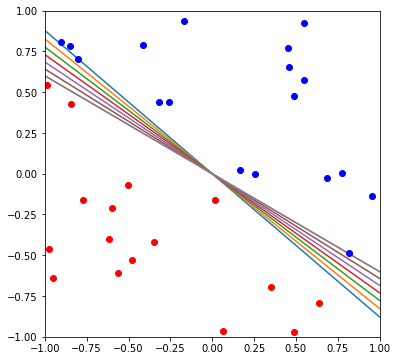

In [43]:
I = y > 0
J = y < 0
plt.figure(figsize=(6, 6))
plt.xlim(-1, 1)
plt.ylim(-1, 1)

t = np.arange(-1, 1.1, 2)
for theta in np.arange(0.85, 1.03, 0.03):
    w0, w1 = W(theta)
    plt.plot(t, -w0/w1*t)
w0, w1 = W(1.03)
plt.plot(t, -w0/w1*t)
plt.plot(X[I, 0], X[I, 1], 'bo')
plt.plot(X[J, 0], X[J, 1], 'ro')
plt.show()

In [57]:
def W(theta):
    return np.array([np.cos(theta), np.sin(theta)])

def cost(X, y, w):
    return np.sum(np.maximum(-y*(X.dot(w)), 0))

thetas = np.arange(0, 2*np.pi, 0.01)

U = np.maximum(-y.reshape(-1, 1)*X.dot(W(thetas)), 0)
# costs = np.array([cost(X, y, W(theta)) for theta in thetas])
# plt.plot(thetas, costs)

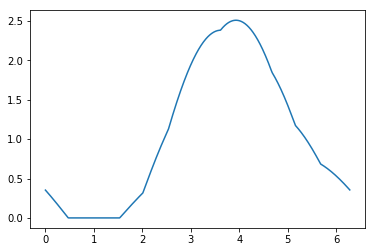

In [67]:
plt.plot(thetas, np.sum(U[:4, :], axis=0))
plt.show()

In [34]:
h

1

In [35]:
g

2